# Weather Data History Analysis - Sweden

**Daily temperature of major cities 1995-2020**

In [1]:
# linear algebra
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/daily-temperature-of-major-cities/city_temperature.csv


In [2]:
weather_data = pd.read_csv("../input/daily-temperature-of-major-cities/city_temperature.csv")

# Explording Weather Data (EDA)

In [3]:
weather_data

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [4]:
weather_data.shape #(row,column)

(2906327, 8)

In [5]:
weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


# Filter Dataframe to Sweden

In [6]:
sweden_weather_df  = weather_data.loc[(weather_data['Country'] =="Sweden")]
sweden_weather_df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
931239,Europe,Sweden,NaN,Stockholm,1,1,1995,31.3
931240,Europe,Sweden,NaN,Stockholm,1,2,1995,30.0
931241,Europe,Sweden,NaN,Stockholm,1,3,1995,17.8
931242,Europe,Sweden,NaN,Stockholm,1,4,1995,22.8
931243,Europe,Sweden,NaN,Stockholm,1,5,1995,24.5
...,...,...,...,...,...,...,...,...
940500,Europe,Sweden,NaN,Stockholm,5,9,2020,47.8
940501,Europe,Sweden,NaN,Stockholm,5,10,2020,49.7
940502,Europe,Sweden,NaN,Stockholm,5,11,2020,40.1
940503,Europe,Sweden,NaN,Stockholm,5,12,2020,40.8


In [7]:
sweden_weather_df.isnull()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
931239,False,False,True,False,False,False,False,False
931240,False,False,True,False,False,False,False,False
931241,False,False,True,False,False,False,False,False
931242,False,False,True,False,False,False,False,False
931243,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
940500,False,False,True,False,False,False,False,False
940501,False,False,True,False,False,False,False,False
940502,False,False,True,False,False,False,False,False
940503,False,False,True,False,False,False,False,False


**Convert AvgTemperature from Fahrenhei to Celsius**
> Formula (°F − 32) × 5/9.

In [8]:
sweden_weather_df['AvgTemperature'] = (sweden_weather_df['AvgTemperature']  -32) * 5/9 
sweden_weather_df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
931239,Europe,Sweden,NaN,Stockholm,1,1,1995,-0.388889
931240,Europe,Sweden,NaN,Stockholm,1,2,1995,-1.111111
931241,Europe,Sweden,NaN,Stockholm,1,3,1995,-7.888889
931242,Europe,Sweden,NaN,Stockholm,1,4,1995,-5.111111
931243,Europe,Sweden,NaN,Stockholm,1,5,1995,-4.166667
...,...,...,...,...,...,...,...,...
940500,Europe,Sweden,NaN,Stockholm,5,9,2020,8.777778
940501,Europe,Sweden,NaN,Stockholm,5,10,2020,9.833333
940502,Europe,Sweden,NaN,Stockholm,5,11,2020,4.500000
940503,Europe,Sweden,NaN,Stockholm,5,12,2020,4.888889


# Maximum Temperature at Sweden
> 1995-2020

In [9]:
weather_max_temp = sweden_weather_df.max()
weather_max_temp

Region               Europe
Country              Sweden
State                  None
City              Stockholm
Month                    12
Day                      31
Year                   2020
AvgTemperature    26.222222
dtype: object

# Minimum Temperature at Sweden
> 1995-2020

In [10]:
weather_min_temp = sweden_weather_df.min()
weather_min_temp

Region               Europe
Country              Sweden
State                  None
City              Stockholm
Month                     1
Day                       1
Year                   1995
AvgTemperature   -72.777778
dtype: object

# Temperature Measurements Year 1995

In [11]:
sweden_weather_1995  = sweden_weather_df.loc[(sweden_weather_df['Year'] ==1995)]
sweden_weather_1995

,Region,Country,State,City,Month,Day,Year,AvgTemperature
931239,Europe,Sweden,NaN,Stockholm,1,1,1995,-0.388889
931240,Europe,Sweden,NaN,Stockholm,1,2,1995,-1.111111
931241,Europe,Sweden,NaN,Stockholm,1,3,1995,-7.888889
931242,Europe,Sweden,NaN,Stockholm,1,4,1995,-5.111111
931243,Europe,Sweden,NaN,Stockholm,1,5,1995,-4.166667
...,...,...,...,...,...,...,...,...
931599,Europe,Sweden,NaN,Stockholm,12,27,1995,-13.666667
931600,Europe,Sweden,NaN,Stockholm,12,28,1995,-11.111111
931601,Europe,Sweden,NaN,Stockholm,12,29,1995,-7.722222
931602,Europe,Sweden,NaN,Stockholm,12,30,1995,-5.055556


Text(0.5, 1.0, 'Monyjly Temperature bar Year 1995')

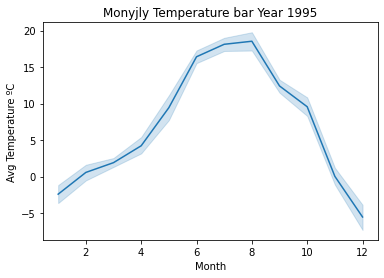

In [12]:
sns.lineplot(x = sweden_weather_1995["Month"], 
             y = sweden_weather_1995["AvgTemperature"] )
plt.ylabel("Avg Temperature ºC")
plt.title("Monyjly Temperature bar Year 1995")

# Weather Heatmap - Sweden 
> 1995-2020

In [13]:
# Sweden Monthly Heatmap Climate Change
sweden_df = sweden_weather_df[sweden_weather_df['Country'] == 'Sweden'].reset_index().drop(columns = ['index'])

sweden_by_month = pd.pivot_table(data=sweden_df, index='Month', columns='Year', values='AvgTemperature', aggfunc='mean')
sweden_by_month

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Month,,,,,,,,,,,,,,,,,,,,,
1,-2.421147,-3.924731,-2.403226,-1.822581,-4.021505,-0.901434,-0.453405,-0.745520,-6.102151,-3.315412,...,-2.143369,-1.462366,-4.206093,-1.664875,0.711470,-4.688172,-0.849462,-2.722222,-4.550179,3.783154
2,0.559524,-7.042146,0.059524,1.505952,-1.934524,0.157088,-3.696429,1.686508,-3.779762,-1.591954,...,-4.873016,-3.614943,-1.734127,-0.486111,0.966270,-0.053640,-0.371032,-3.831349,1.678571,2.503831
3,1.899642,-0.878136,1.933692,-0.306452,1.489247,2.109319,-0.586022,2.614695,3.227599,1.403226,...,0.874552,3.788530,-3.195341,3.949821,3.308244,0.279570,2.767025,-2.137993,2.363799,3.125448
4,4.212963,6.366667,4.279630,3.757407,7.692593,7.151852,6.140741,7.527778,4.948148,6.542593,...,8.561111,4.609259,4.470370,6.668519,6.731481,5.581481,4.357407,6.392593,3.929630,6.590741
5,9.435484,9.143369,9.094982,10.299283,10.856631,12.836918,11.553763,13.188172,12.172043,10.854839,...,11.360215,11.637993,12.982079,10.646953,9.491039,9.731183,10.887097,15.206093,-0.630824,7.606838
6,16.414815,15.587037,16.092593,13.159259,17.861111,15.018519,15.894444,5.668519,16.551852,14.431481,...,16.940741,13.279630,16.229630,13.916667,13.972222,15.966667,14.909259,16.653704,18.005556,NaN
7,18.125448,16.435484,19.145161,16.127240,20.736559,16.718638,20.440860,19.736559,21.218638,16.824373,...,19.173835,17.415771,18.071685,20.120072,16.448029,18.145161,16.767025,21.890681,17.087814,NaN
8,18.543011,19.946237,20.777778,14.921147,17.471326,16.485663,17.713262,21.646953,18.102151,18.213262,...,16.763441,16.317204,17.132616,17.075269,17.139785,16.456989,16.202509,18.593190,17.462366,NaN
9,12.412963,10.700000,12.787037,12.938889,16.092593,11.664815,12.787037,13.759259,11.053704,13.151852,...,13.659259,12.079630,12.194444,12.618519,12.833333,11.851852,12.696296,13.768519,12.542593,NaN


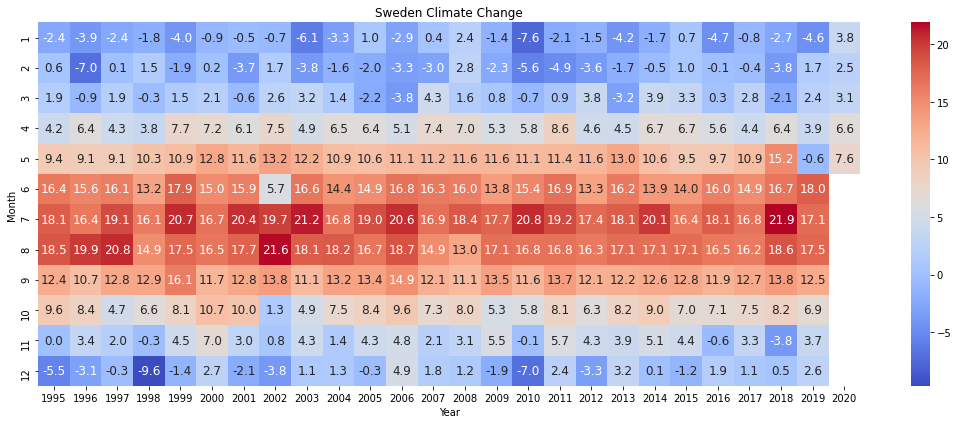

In [14]:
# Heatmap Plot
plt.figure(figsize=(15,6))
sns.heatmap(data=sweden_by_month, cmap='coolwarm', annot=True, fmt=".1f", annot_kws={'fontsize':12})
plt.title("Sweden Climate Change")
plt.tight_layout()

# Temperature Movement - Sweden
> Display the movement of average mean temperature 1995-2020

Text(0, 0.5, 'Average Temperature')

<Figure size 720x288 with 0 Axes>

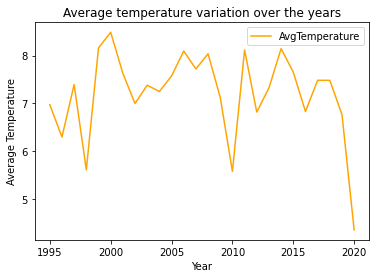

In [15]:
# Display the movement of average mean temperature 1995-2020
plt.figure(figsize=(10,4))
pd.pivot_table(sweden_weather_df,index=['Year'],values=['AvgTemperature'],aggfunc=np.mean).plot(kind='line', color='orange')
plt.title("Average temperature variation over the years", loc='center')
plt.xlabel("Year")
plt.ylabel("Average Temperature")
#plt.xticks(range(1995,2020))

Text(0.5, 0, 'Year')

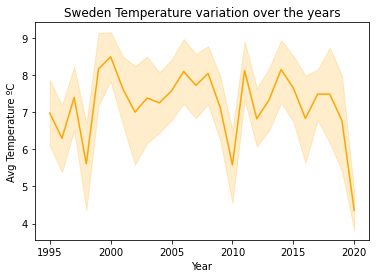

In [16]:
sns.lineplot(x = 'Year', y = 'AvgTemperature', data = sweden_weather_df, color='orange')
plt.ylabel("Avg Temperature ºC")
plt.title("Sweden Temperature variation over the years")
plt.xlabel("Year")
#plt.xticks(range(1995,2020))

**Please consider upvoting if you find it useful to you :) .**